In [340]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas.io.json import json_normalize
import time
import datetime as dt
import glob
import seaborn as sns
from colour import Color
import folium
from folium import plugins
from itertools import cycle, islice
import scipy.stats as stats
from scipy.stats import norm

In [2]:
def all_csv_df():
    '''
    Loops through the .csv in /raw and concatonates them into 1 Dataframe
    '''
    path = r'/Users/AaronLee/Documents/GalvanizeDSI/UnsplashEDA/raw'
    all_files = glob.glob(path + "/*.csv")

    list_holder = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        list_holder.append(df)

    US_df = pd.concat(list_holder, axis=0, ignore_index=True)
    return US_df

In [3]:
full_df = all_csv_df()
Unsplash_df = full_df.drop_duplicates('id')
Unsplash_df = Unsplash_df[['id', 'user.username', 'created_at', 'views', 'likes', 'downloads', 'exif.make', 'exif.aperture', 'location.country', 'user.total_photos', 'user.total_collections', 'user.instagram_username', 'user.twitter_username', 'color']]
Unsplash_df['dl_percent'] = (Unsplash_df['downloads'] / Unsplash_df['views']) * 100
Unsplash_df['like_percent'] = (Unsplash_df['likes'] / Unsplash_df['views']) * 100
Unsplash_df.head()

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,user.total_collections,user.instagram_username,user.twitter_username,color,dl_percent,like_percent
0,orVg0K35hlw,anitaaustvika,2019-08-11T02:16:27-04:00,714716,118,1460,NIKON CORPORATION,2.8,NaN,336,0,rareflower_photography,NaN,#26150A,0.204277,0.016510
1,xvPXJy2su0g,schluditsch,2019-08-18T20:46:07-04:00,301662,29,567,Canon,4.5,NaN,32,9,schluditsch,NaN,#201D1A,0.187959,0.009613
2,QS-19iV-uC4,janellesoto_,2019-08-27T05:47:45-04:00,280267,66,1175,SONY,7.1,NaN,23,0,janellesoto_,NaN,#553E42,0.419243,0.023549
3,vP7gLpFYyq4,elijahsad,2019-08-06T05:46:58-04:00,525334,56,1309,SONY,1.8,NaN,97,0,elijah_tmn,Elijah_sad,#E9E7EC,0.249175,0.010660
4,wzEGhQJOEbA,mrthetrain,2019-08-22T16:15:50-04:00,219458,6,426,Canon,1.8,NaN,349,62,mr_theTrain,mrtheTrain,#E6E8D6,0.194115,0.002734


In [4]:
full_df = full_df.drop_duplicates('id')

In [ ]:
# full_df.describe()

In [ ]:
# for col in full_df.columns: 
#     print(col) 

# Does Camera Model make a Difference?

In [5]:
Unsplash_df['exif.make'].value_counts()

Canon                          778
NIKON CORPORATION              392
SONY                           391
FUJIFILM                       170
Apple                           49
DJI                             32
Panasonic                       26
NORITSU KOKI                    23
Leica Camera AG                 22
Hasselblad                      12
OLYMPUS CORPORATION             11
RICOH IMAGING COMPANY, LTD.     10
HUAWEI                          10
GoPro                            8
Xiaomi                           7
Sony                             7
OLYMPUS IMAGING CORP.            7
Google                           6
LEICA CAMERA AG                  6
Nikon                            4
OnePlus                          3
samsung                          3
Fujica                           2
PENTAX                           2
FUJI PHOTO FILM CO., LTD.        2
FujiFilm                         1
Parrot                           1
Fujifilm                         1
SAMSUNG             

### Breakdown of Camera usage (Top 5)

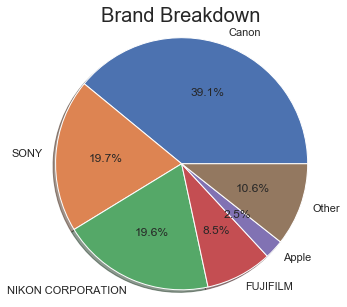

In [141]:
# pie chart of workers
labels = ['Canon', 'SONY', 'NIKON CORPORATION', 'FUJIFILM', 'Apple', 'Other']
sizes = [Unsplash_df['exif.make'].value_counts()[0],
         Unsplash_df['exif.make'].value_counts()[1],
         Unsplash_df['exif.make'].value_counts()[2],
         Unsplash_df['exif.make'].value_counts()[3],
         Unsplash_df['exif.make'].value_counts()[4],
         sum(Unsplash_df['exif.make'].value_counts()[5:])
        ]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Brand Breakdown', fontsize=20)
plt.show()

In [169]:
# x1 = list(Unsplash_df[Unsplash_df['main_color'] == 'black']['exif.make'])
# x2 = list(Unsplash_df[Unsplash_df['main_color'] == 'white']['exif.make'])
# x3 = list(Unsplash_df[Unsplash_df['main_color'] == 'yellow']['exif.make'])
# x4 = list(Unsplash_df[Unsplash_df['main_color'] == 'red']['exif.make'])
# x5 = list(Unsplash_df[Unsplash_df['main_color'] == 'cyan']['exif.make'])

# # Assign colors for each airline and the names
# colors = ['black', 'grey', 'yellow', 'red', 'cyan']
# names = ['black', 'white', 'yellow',
#          'red', 'cyan']
         
# # Make the histogram using a list of lists
# # Normalize the flights and assign colors and names
# plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=False,
#         color = colors, label=names)

# # Plot formatting
# plt.xticks(rotation=45)
# plt.legend()
# plt.xlabel('Colors')
# plt.ylabel('Total Colors')
# plt.title('Side-by-Side Histogram with Camera Color Profile');

In [142]:
model_df = Unsplash_df.groupby(['exif.make']).mean()

In [143]:
target_model = model_df.loc[['Canon', 'SONY', 'NIKON CORPORATION', 'FUJIFILM', 'Apple']].sort_index(ascending=False).reset_index()

In [144]:
target_model

,exif.make,views,likes,downloads,exif.aperture,user.total_photos,user.total_collections,dl_percent,like_percent,red,green,blue,avg_colors
0,SONY,500944.299233,44.751918,911.306905,4.135135,198.657289,4.670077,0.232086,0.012837,150.355499,138.120205,126.964194,138.145780
1,NIKON CORPORATION,418228.007653,45.915816,894.030612,4.224615,201.112245,3.058673,0.242916,0.013734,157.150510,145.084184,133.727041,144.982143
2,FUJIFILM,600608.641176,44.729412,997.235294,3.807101,333.805882,5.664706,0.215836,0.009920,167.341176,162.217647,156.047059,161.552941
3,Canon,517185.568123,46.566838,966.118252,4.451058,237.555270,7.434447,0.236794,0.012899,151.748072,141.083548,133.717224,141.856041
4,Apple,411373.612245,48.408163,912.857143,2.012500,329.285714,1.775510,0.244715,0.014870,125.244898,115.183673,110.530612,116.612245


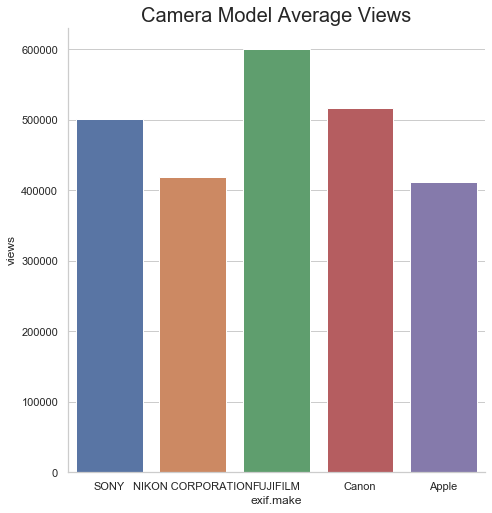

In [145]:
sns.catplot(x='exif.make', y='views', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

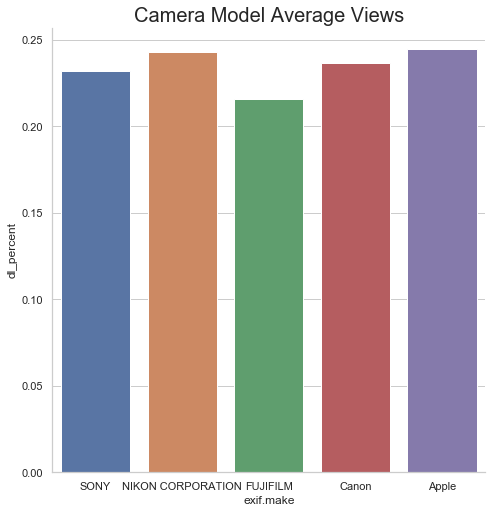

In [148]:
sns.catplot(x='exif.make', y='dl_percent', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

# Is More Total Photos Correlated with more Engagment?

In [ ]:
user_group = Unsplash_df.groupby(['user.username'])

In [ ]:
user_group.first()

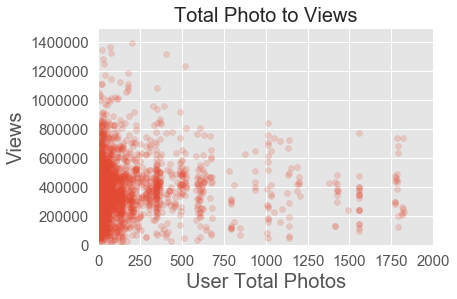

In [362]:
x = Unsplash_df['user.total_photos'].tolist()
y_view = Unsplash_df['views'].tolist()

plt.scatter(x, y_view, alpha=0.2)
plt.title('Total Photo to Views', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Views', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000)
plt.ylim(0, 1500000);

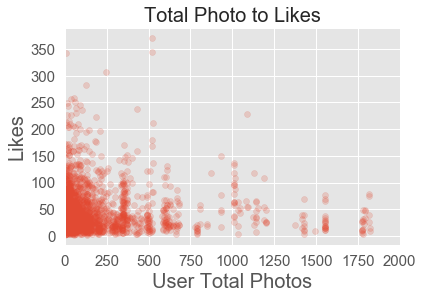

In [363]:
x = Unsplash_df['user.total_photos'].tolist()
y_likes = Unsplash_df['likes'].tolist()

plt.scatter(x, y_likes, alpha=0.2)
plt.title('Total Photo to Likes', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Likes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000);
# plt.ylim(0, 1500000);

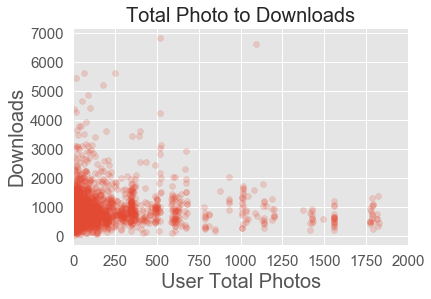

In [364]:
x = Unsplash_df['user.total_photos'].tolist()
y_dl = Unsplash_df['downloads'].tolist()

plt.scatter(x, y_dl, alpha=0.2)
plt.title('Total Photo to Downloads', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Downloads', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000);
# plt.ylim(0, 1500000);

# Aperture Comparison

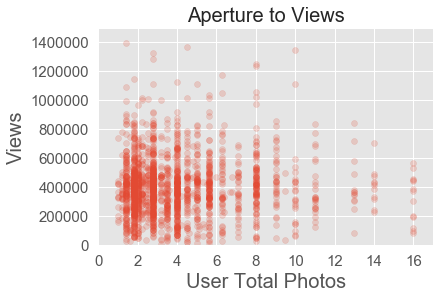

In [365]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_view, alpha=0.2)
plt.title('Aperture to Views', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Views', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17)
plt.ylim(0, 1500000);

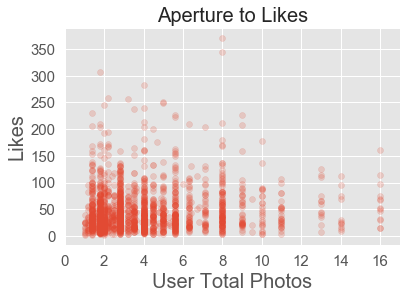

In [366]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_likes, alpha=0.2)
plt.title('Aperture to Likes', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Likes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17);

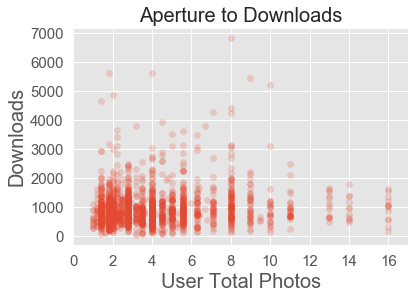

In [367]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_dl, alpha=0.2)
plt.title('Aperture to Downloads', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Downloads', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17);

# Location Relevance

In [ ]:
loc_group = Unsplash_df.groupby(['location.country'])

In [ ]:
loc_group.mean()

# Hex --> RBG

In [ ]:
# Unsplash_df['color'].value_counts()

In [6]:
#Appending colors to a singular list
color_list = Unsplash_df['color'].tolist()
rgb_list = []

for i in color_list:
    h = i.lstrip('#')
    rgb_list.append(tuple(int(h[i:i+2], 16) for i in (0, 2, 4)))

#Splitting into 3 categories
red = []
green = []
blue = []

for i in rgb_list:
    red.append(i[0])
    
for i in rgb_list:
    green.append(i[1])

for i in rgb_list:
    blue.append(i[2])
    
# Making new columns to dataframe
Unsplash_df['rgb'] = rgb_list
Unsplash_df['red'] = red
Unsplash_df['green'] = green
Unsplash_df['blue'] = blue

In [8]:
'''
red_plot = Unsplash_df['red'].value_counts().plot(kind='hist', bins=30, alpha=0.4)
green_plot = Unsplash_df['green'].value_counts().plot(kind='hist', bins=30, alpha=0.4)
blue_plot = Unsplash_df['blue'].value_counts().plot(kind='hist', bins=30, alpha=0.4);
'''

"\nred_plot = Unsplash_df['red'].value_counts().plot(kind='hist', bins=30, alpha=0.4)\ngreen_plot = Unsplash_df['green'].value_counts().plot(kind='hist', bins=30, alpha=0.4)\nblue_plot = Unsplash_df['blue'].value_counts().plot(kind='hist', bins=30, alpha=0.4);\n"

## Distribution Based on Color

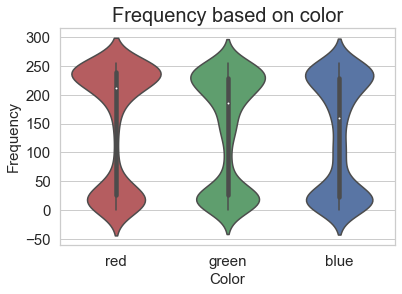

In [9]:
#Violin plot of each color
sns.set(style='whitegrid')
my_pal = {"red": "r", "green": "g", "blue":"b"}
sns.violinplot(data=Unsplash_df[['red', 'green', 'blue']], palette=my_pal)
plt.title('Frequency based on color', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Frequency', fontsize=15);

In [368]:
# Unsplash_df.describe()
# r = 151
# g = 140
# b = 130

### Seperation values function for each color

In [11]:
#Categorizes color in a binary way

bin_list = []

for i in rgb_list:
    if i[0] > 151 and i[1] < 140 and i[2] < 130:
        bin_list.append('red')
    elif i[0] > 151 and i[1] < 140 and i[2] > 130:
        bin_list.append('magenta')
    elif i[0] > 151 and i[1] > 140 and i[2] < 130:
        bin_list.append('yellow')
    elif i[0] > 151 and i[1] > 140 and i[2] > 130:
        bin_list.append('white')
    elif i[0] < 151 and i[1] > 140 and i[2] > 130:
        bin_list.append('cyan')
    elif i[0] < 151 and i[1] > 140 and i[2] < 130:
        bin_list.append('lime')
    elif i[0] < 151 and i[1] < 140 and i[2] > 130:
        bin_list.append('blue')
    else:
        bin_list.append('black')

#Makes new column with seperated color
Unsplash_df['main_color'] = bin_list

#Create average color from RGB values
Unsplash_df_list = ((Unsplash_df['red'] + Unsplash_df['green'] + Unsplash_df['blue']) // 3).tolist()
Unsplash_df['avg_colors'] = Unsplash_df_list

In [369]:
# Unsplash_df.groupby('main_color').count()

In [381]:
Unsplash_df

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,...,user.twitter_username,color,dl_percent,like_percent,rgb,red,green,blue,main_color,avg_colors
0,orVg0K35hlw,anitaaustvika,2019-08-11T02:16:27-04:00,714716,118,1460,NIKON CORPORATION,2.8,NaN,336,...,NaN,#26150A,0.204277,0.016510,"(38, 21, 10)",38,21,10,black,23
1,xvPXJy2su0g,schluditsch,2019-08-18T20:46:07-04:00,301662,29,567,Canon,4.5,NaN,32,...,NaN,#201D1A,0.187959,0.009613,"(32, 29, 26)",32,29,26,black,29
2,QS-19iV-uC4,janellesoto_,2019-08-27T05:47:45-04:00,280267,66,1175,SONY,7.1,NaN,23,...,NaN,#553E42,0.419243,0.023549,"(85, 62, 66)",85,62,66,black,71
3,vP7gLpFYyq4,elijahsad,2019-08-06T05:46:58-04:00,525334,56,1309,SONY,1.8,NaN,97,...,Elijah_sad,#E9E7EC,0.249175,0.010660,"(233, 231, 236)",233,231,236,white,233
4,wzEGhQJOEbA,mrthetrain,2019-08-22T16:15:50-04:00,219458,6,426,Canon,1.8,NaN,349,...,mrtheTrain,#E6E8D6,0.194115,0.002734,"(230, 232, 214)",230,232,214,white,225
5,GJCWFap8gWE,byrdman85,2019-08-09T16:30:17-04:00,444788,16,661,NaN,NaN,NaN,98,...,NaN,#F4F6F8,0.148610,0.003597,"(244, 246, 248)",244,246,248,white,246
6,gs7biLqCDDQ,worldsbetweenlines,2019-08-12T01:38:36-04:00,421988,54,946,Canon,1.4,NaN,1188,...,LoveTheBicycle,#E9DCCF,0.224177,0.012797,"(233, 220, 207)",233,220,207,white,220
7,yhz3Nus7zS0,ekrulila,2019-09-02T05:36:41-04:00,85628,19,294,NIKON CORPORATION,2.0,NaN,17,...,ekrulila,#151414,0.343346,0.022189,"(21, 20, 20)",21,20,20,black,20
8,FESBgp8i9lY,hadleyjin_,2019-08-13T03:42:51-04:00,1124169,283,2753,Canon,4.0,NaN,128,...,HadleyJin,#8C8893,0.244892,0.025174,"(140, 136, 147)",140,136,147,blue,141
9,dqcAlGZb4KM,ellienelie,2019-08-08T07:41:49-04:00,413072,43,765,Canon,2.8,NaN,94,...,NaN,#CBD0D1,0.185198,0.010410,"(203, 208, 209)",203,208,209,white,206


# Color(est) Photos Analysis

#### White(est)

In [15]:
#Make Dataframe for just only white
white_df = Unsplash_df[Unsplash_df['main_color'] == 'white']
white_df.sort_values(['avg_colors', 'dl_percent'], ascending=False)

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,...,user.twitter_username,color,dl_percent,like_percent,rgb,red,green,blue,main_color,avg_colors
2839,M35j-B2q8Rw,jonathanborba,2019-09-08T11:55:34-04:00,220501,96,968,Canon,1.8,NaN,596,...,NaN,#FFFFFF,0.439000,0.043537,"(255, 255, 255)",255,255,255,white,255
1136,8RN9NPDwWgE,pavelanoshin,2019-08-17T21:59:56-04:00,346764,17,917,Canon,1.8,NaN,89,...,pavelanoshin,#FFFFFF,0.264445,0.004902,"(255, 255, 255)",255,255,255,white,255
87,K8lQfACC8WE,wx1993,2019-09-01T22:03:09-04:00,72114,18,190,Canon,4.0,NaN,847,...,NaN,#FFFFFF,0.263472,0.024960,"(255, 255, 255)",255,255,255,white,255
3073,lO_U06g1WfM,drew_beamer,2019-09-01T12:45:20-04:00,219386,41,575,Canon,5.6,United States,104,...,beamomatic9000,#FFFFFF,0.262095,0.018689,"(255, 255, 255)",255,255,255,white,255
2527,89JjCbf_NvA,steve3p_0,2019-08-11T16:15:23-04:00,808769,130,2043,GoPro,2.8,NaN,608,...,NaN,#FFFFFF,0.252606,0.016074,"(255, 255, 255)",255,255,255,white,255
4051,BsS0gMB1kBU,itsbluestudio,2019-08-12T05:31:37-04:00,409081,19,1029,FUJIFILM,8.0,NaN,223,...,itsBlueStudio,#FFFFFF,0.251539,0.004645,"(255, 255, 255)",255,255,255,white,255
561,nIvrzJPFC-Y,judebeck,2019-08-21T01:59:50-04:00,323534,17,714,NIKON CORPORATION,2.2,NaN,71,...,NaN,#FFFFFF,0.220688,0.005254,"(255, 255, 255)",255,255,255,white,255
268,lZXHJulIF1M,mitsuo_z,2019-08-17T23:41:50-04:00,316079,4,650,Canon,5.6,NaN,165,...,NaN,#FFFFFF,0.205645,0.001266,"(255, 255, 255)",255,255,255,white,255
1034,FpPpqiu2n7I,heyitsadamk,2019-08-22T16:38:43-04:00,352221,41,710,NIKON CORPORATION,2.2,United States,2,...,NaN,#FFFFFF,0.201578,0.011640,"(255, 255, 255)",255,255,255,white,255
3992,jyxwORL3TzI,niclasmoser,2019-09-05T02:16:56-04:00,162980,25,324,Canon,2.8,NaN,26,...,NaN,#FFFFFF,0.198797,0.015339,"(255, 255, 255)",255,255,255,white,255


#### Black(est)

In [16]:
black_df = Unsplash_df[Unsplash_df['main_color'] == 'black']
black_df.sort_values(['avg_colors', 'dl_percent'])

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,...,user.twitter_username,color,dl_percent,like_percent,rgb,red,green,blue,main_color,avg_colors
507,2iVAE0914hs,marcuschen1,2019-08-12T11:01:03-04:00,423992,11,468,FUJIFILM,1.0,NaN,60,...,NaN,#000100,0.110379,0.002594,"(0, 1, 0)",0,1,0,black,0
3832,CygFgxHqfSI,anniespratt,2019-08-12T04:20:19-04:00,461071,15,597,NaN,NaN,NaN,6625,...,anniespratt,#000000,0.129481,0.003253,"(0, 0, 0)",0,0,0,black,0
397,j6Y4lyBFVdc,ussi,2019-08-10T16:14:59-04:00,1770397,56,2593,Canon,4.5,United States,80,...,NaN,#000000,0.146464,0.003163,"(0, 0, 0)",0,0,0,black,0
2952,89xx7Icy38M,raspopovamarisha,2019-08-23T14:00:02-04:00,322437,20,531,NIKON CORPORATION,NaN,NaN,61,...,NaN,#000000,0.164683,0.006203,"(0, 0, 0)",0,0,0,black,0
1118,aoqXcvxI9NU,mreizberg,2019-08-09T13:35:40-04:00,689364,40,1359,NaN,NaN,Lithuania,6,...,NaN,#000000,0.197138,0.005802,"(0, 0, 0)",0,0,0,black,0
2535,Yzqq5YssljQ,mreizberg,2019-08-09T13:35:39-04:00,783468,128,1608,NaN,NaN,Lithuania,6,...,NaN,#000000,0.205241,0.016338,"(0, 0, 0)",0,0,0,black,0
237,j8QdjggaCPA,hadleyjin_,2019-08-18T22:18:16-04:00,330993,17,754,Canon,6.3,NaN,128,...,HadleyJin,#000000,0.227799,0.005136,"(0, 0, 0)",0,0,0,black,0
111,15mkCCDr9iY,karljkhedin,2019-09-03T07:47:35-04:00,191552,43,568,NaN,NaN,NaN,104,...,NaN,#000001,0.296525,0.022448,"(0, 0, 1)",0,0,1,black,0
433,fRqMGHKRDl8,drew_beamer,2019-09-01T12:45:20-04:00,153869,27,588,Canon,4.5,NaN,104,...,beamomatic9000,#000000,0.382143,0.017547,"(0, 0, 0)",0,0,0,black,0
525,VneWikA0NUI,ninjason,2019-09-03T22:05:43-04:00,119263,66,529,Canon,2.8,NaN,1557,...,NaN,#000000,0.443558,0.055340,"(0, 0, 0)",0,0,0,black,0


In [ ]:
# print(white_df.mean())
# print(black_df.mean())

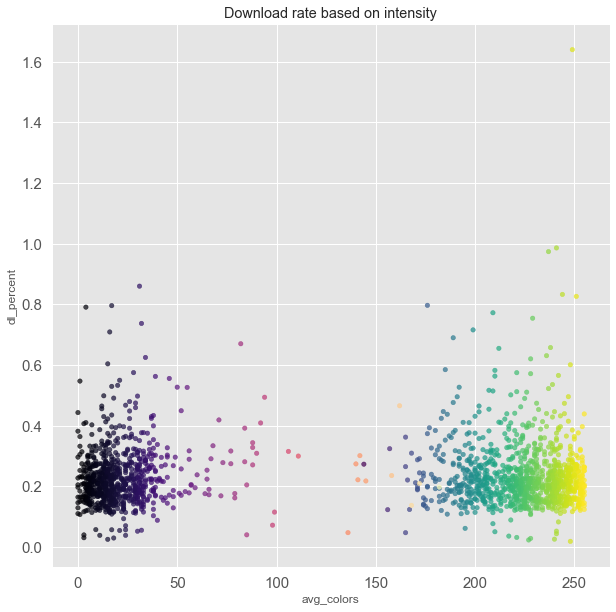

In [226]:
#White_mean = 0.244
#Black_mean = 0.257
ax = white_df.plot.scatter(x='avg_colors', y='dl_percent', c='avg_colors', colorbar = False, colormap='viridis', alpha=0.7, title='Download rate based on intensity', figsize= (10, 10), fontsize=15)
black_df.plot.scatter(x='avg_colors', y='dl_percent', c='avg_colors', colorbar = False, colormap='magma', alpha=0.7, ax=ax);

# Best 'Engagement'

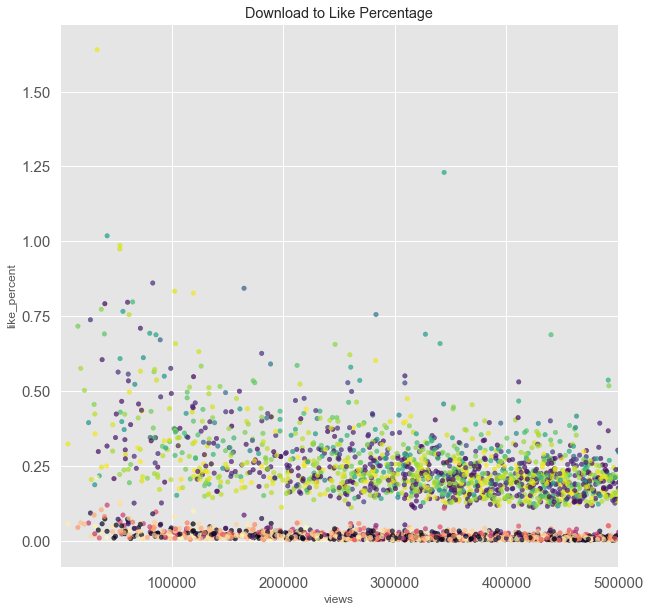

In [227]:
#dl_percent = 0.236552
#like_percent = 0.012917
ax = Unsplash_df.plot.scatter(x='views', y='dl_percent', c='avg_colors', colorbar = False, colormap='viridis', alpha=0.7, title='Download to Like Percentage', figsize= (10, 10), fontsize=15)
Unsplash_df.plot.scatter(x='views', y='like_percent', c='avg_colors', colorbar = False, colormap='magma', alpha=0.7, ax=ax)
plt.xlim(9, 500000);

In [ ]:
# Unsplash_df.mean()

# Color and Camera Correlation

In [370]:
# Unsplash_df['main_color'].value_counts()

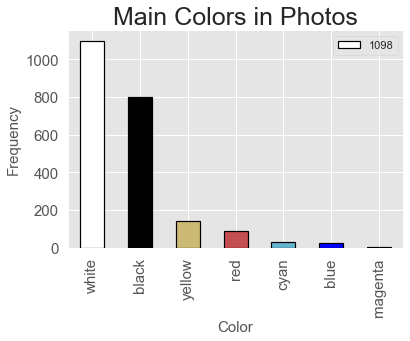

In [376]:
my_colors = list(islice(cycle(['w', 'black', 'y', 'r', 'c', 'blue', 'm']), None, len(Unsplash_df)))
Unsplash_df['main_color'].value_counts().plot.bar(color=my_colors, edgecolor= 'black', linewidth=1.2)
plt.title('Main Colors in Photos', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(Unsplash_df['main_color'].value_counts());

In [377]:
canon = Unsplash_df[Unsplash_df['exif.make'] == 'Canon'].groupby('main_color')
nikon = Unsplash_df[Unsplash_df['exif.make'] == 'NIKON CORPORATION'].groupby('main_color')
sony = Unsplash_df[Unsplash_df['exif.make'] == 'SONY'].groupby('main_color')
fujifilm = Unsplash_df[Unsplash_df['exif.make'] == 'FUJIFILM'].groupby('main_color')
apple = Unsplash_df[Unsplash_df['exif.make'] == 'Apple'].groupby('main_color')

In [378]:
canon_dict = canon['main_color'].count().to_dict()
nikon_dict = nikon['main_color'].count().to_dict()
sony_dict = sony['main_color'].count().to_dict()
fujifilm_dict = fujifilm['main_color'].count().to_dict()
apple_dict = apple['main_color'].count().to_dict()

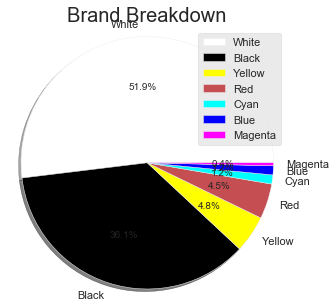

In [380]:
labels = ['White', 'Black', 'Yellow', 'Red', 'Cyan', 'Blue', 'Magenta']
sizes = [canon_dict['white'],
         canon_dict['black'],
         canon_dict['yellow'],
         canon_dict['red'],
         canon_dict['cyan'],
         canon_dict['blue'], 
         canon_dict['magenta']
        ]
my_colors = ['w', 'black', 'yellow', 'r', 'cyan', 'blue', 'magenta']

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=my_colors)
ax1.axis('equal')
plt.title('Brand Breakdown', fontsize=20)
plt.legend()
plt.show()

In [ ]:
sony_dict

In [ ]:
X = np.arange(len(canon_dict))
ax = plt.subplot(111)
ax.bar(X, canon_dict.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, nikon_dict.values(), width=0.2, color='g', align='center')
# ax.bar(X-0.4, sony_dict.values(), width=0.2, color='y', align='center')
# ax.bar(X-0.6, fujifilm_dict.values(), width=0.2, color='m', align='center')
# ax.bar(X-0.8, apple_dict.values(), width=0.2, color='c', align='center')
# ax.legend(('Canon','Nikon'))
plt.xticks(X, canon_dict.keys())
plt.title("Color Comparison", fontsize=17)
plt.show()

In [ ]:
plt.bar(canon_dict.keys(), canon_dict.values())

In [ ]:
Unsplash_df[['exif.make', 'main_color']].dropna()

# Hypothesis Testing

In [ ]:
'''
I received an email from 
H0: @user stats have lower engagement due to a higher contrast in color
H1: @user stats have higher engagement due to a higher contrast in color
'''

In [98]:
# Unsplash_df['user.username'].value_counts()

In [34]:
# Unsplash_df.sum()

In [139]:
user_df = Unsplash_df[Unsplash_df['user.username'] == 'anitaaustvika']

In [96]:
# user_df.describe()

In [296]:
#Getting values for binomial test
total_view_sum = sum(Unsplash_df['views'])
total_dl_sum = sum(Unsplash_df['downloads'])
total_dl_mean = total_dl_sum / total_view_sum

user_view_sum = sum(user_df['views'])
user_dl_sum = sum(user_df['downloads'])

In [297]:
binomial = stats.binom(n=user_view_sum,p=total_dl_mean)
p_value = 1 - binomial.cdf(user_dl_sum)
p_value

1.1102230246251565e-16

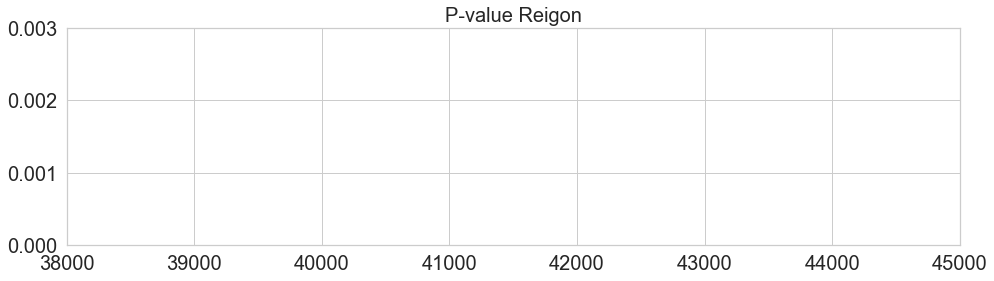

In [140]:
fig, axs = plt.subplots(1, figsize=(16,4))
#plot binomial distribution
bars = axs.bar(range(45000), 
              [binomial.pmf(i) for i in range(45000)], 
              color="grey", edgecolor='black', align="center")
axs.set_xlim(38000, 45000)
axs.set_ylim(0,0.003)

#p-value area: red
for i in range(44403, 45000):
    bars[i].set_color('red')
    
# Set title & label    
axs.set_title("P-value Reigon", fontsize = 20)
# Font size setting on each axis
axs.tick_params(axis='both', which='major', labelsize=20)

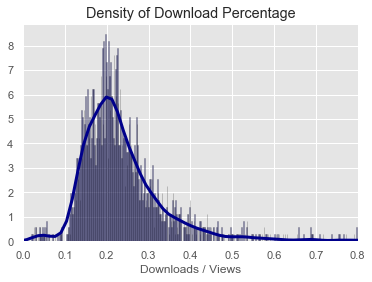

In [228]:
sns.distplot(Unsplash_df['dl_percent'], hist=True, kde=True, 
             bins=1000,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title('Density of Download Percentage')
plt.xlabel('Downloads / Views')
plt.xlim(0,0.8);

### Color(white) hypothesis test to total

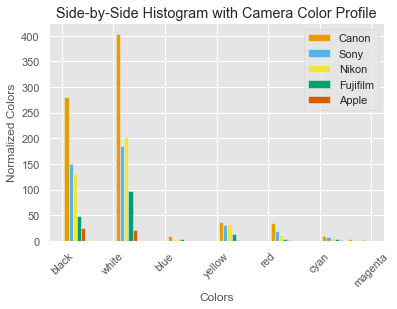

In [524]:
x1 = list(Unsplash_df[Unsplash_df['exif.make'] == 'Canon']['main_color'])
x2 = list(Unsplash_df[Unsplash_df['exif.make'] == 'SONY']['main_color'])
x3 = list(Unsplash_df[Unsplash_df['exif.make'] == 'NIKON CORPORATION']['main_color'])
x4 = list(Unsplash_df[Unsplash_df['exif.make'] == 'FUJIFILM']['main_color'])
x5 = list(Unsplash_df[Unsplash_df['exif.make'] == 'Apple']['main_color'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['Canon', 'Sony', 'Nikon',
         'Fujifilm', 'Apple']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=False,
        color = colors, label=names)

# Plot formatting
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Colors')
plt.ylabel('Normalized Colors')
plt.title('Side-by-Side Histogram with Camera Color Profile');

In [291]:
white_df = Unsplash_df[Unsplash_df['main_color'] == 'white']
black_df = Unsplash_df[Unsplash_df['main_color'] == 'black']

In [292]:
# white_df.describe()
# sum(black_df['downloads'])

In [450]:
#Getting values for binomial test
total_white_view_sum = sum(white_df['views'])
total_white_dl_sum = sum(white_df['downloads'])
total_white_dl_mean = white_df['dl_percent'].mean()

total_black_view_sum = sum(black_df['views'])
total_black_dl_sum = sum(black_df['downloads'])
total_black_dl_mean = black_df['dl_percent'].mean()

In [451]:
binomial1 = stats.binom(n=total_white_view_sum,p=total_dl_mean)
p_value_white = 1 - binomial1.cdf(total_white_dl_sum)
p_value_white

0.3673276472493694

In [452]:
binomial2 = stats.binom(n=total_black_view_sum,p=total_dl_mean)
p_value_black = binomial2.cdf(total_black_dl_sum)
p_value_black

0.0

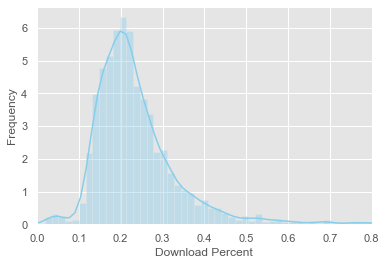

In [325]:
ax = sns.distplot(Unsplash_df['dl_percent'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  )
ax.set(xlabel='Download Percent', ylabel='Frequency')
plt.xlim(0, .8);

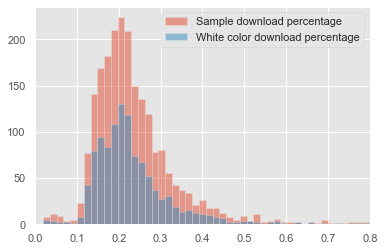

In [335]:
x = Unsplash_df['dl_percent']
y = white_df['dl_percent']

bins = 100

plt.hist(x, bins, alpha=0.5, label='Sample download percentage')
plt.hist(y, bins, alpha=0.5, label='White color download percentage')
plt.xlim(0, 0.8)
plt.legend(loc='upper right')
plt.show()

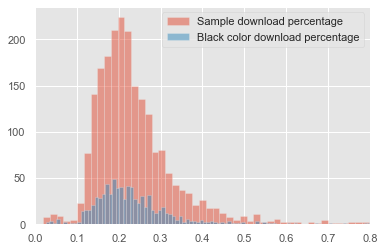

In [336]:
x = Unsplash_df['dl_percent']
y = black_df['dl_percent']

bins = 100

plt.hist(x, bins, alpha=0.5, label='Sample download percentage')
plt.hist(y, bins, alpha=0.5, label='Black color download percentage')
plt.xlim(0, 0.8)
plt.legend(loc='upper right')
plt.show()

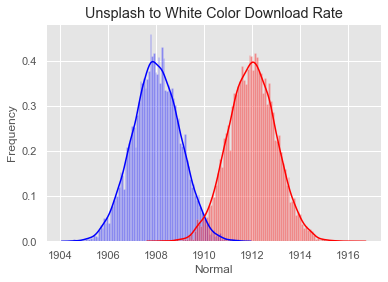

In [359]:
Unsplash_normal = norm.rvs(size=10000,loc=1908,scale=1)
white_normal = norm.rvs(size=10000,loc=1912,scale=1)


ax = sns.distplot(Unsplash_normal,
                  bins=100,
                  kde=True,
                  color='blue')
ax = sns.distplot(white_normal,
                  bins=100,
                  kde=True,
                  color='red')
ax.set(xlabel='Normal', ylabel='Frequency')
plt.title('Unsplash to White Color Download Rate');

In [ ]:
df = Unsplash_df[['dl_percent']]
df['white_color'] = white_df['dl_percent']
ax = df.plot.hist(bins=100, alpha=0.5, density=True)
plt.xlim(0, 0.7);

# U-Test

The U-test does not make assumptions leading to a more accurate model that is more clear in comparing 2 different scenarios.

### Non-white to white

H0: P(non-white) > P(White)
H1: P(non-White) < P(White)

In [453]:
not_white_df = Unsplash_df[Unsplash_df['main_color'] != 'white']
white_df = Unsplash_df[Unsplash_df['main_color'] == 'white']

In [394]:
#Defining non-white and white
not_white_df = Unsplash_df[Unsplash_df['main_color'] != 'white' ]
white_df = Unsplash_df[Unsplash_df['main_color'] == 'white' ]
white_df = white_df[:1088]

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,...,user.twitter_username,color,dl_percent,like_percent,rgb,red,green,blue,main_color,avg_colors
3,vP7gLpFYyq4,elijahsad,2019-08-06T05:46:58-04:00,525334,56,1309,SONY,1.8,NaN,97,...,Elijah_sad,#E9E7EC,0.249175,0.010660,"(233, 231, 236)",233,231,236,white,233
4,wzEGhQJOEbA,mrthetrain,2019-08-22T16:15:50-04:00,219458,6,426,Canon,1.8,NaN,349,...,mrtheTrain,#E6E8D6,0.194115,0.002734,"(230, 232, 214)",230,232,214,white,225
5,GJCWFap8gWE,byrdman85,2019-08-09T16:30:17-04:00,444788,16,661,NaN,NaN,NaN,98,...,NaN,#F4F6F8,0.148610,0.003597,"(244, 246, 248)",244,246,248,white,246
6,gs7biLqCDDQ,worldsbetweenlines,2019-08-12T01:38:36-04:00,421988,54,946,Canon,1.4,NaN,1188,...,LoveTheBicycle,#E9DCCF,0.224177,0.012797,"(233, 220, 207)",233,220,207,white,220
9,dqcAlGZb4KM,ellienelie,2019-08-08T07:41:49-04:00,413072,43,765,Canon,2.8,NaN,94,...,NaN,#CBD0D1,0.185198,0.010410,"(203, 208, 209)",203,208,209,white,206
12,kwativq0a2I,anitaaustvika,2019-09-01T00:12:48-04:00,439770,97,1202,NIKON CORPORATION,7.1,NaN,336,...,NaN,#A8B6E2,0.273325,0.022057,"(168, 182, 226)",168,182,226,white,192
15,-Ega2zbjoNo,lukasg_,2019-08-15T22:37:04-04:00,625680,41,1239,Canon,5.0,California,2,...,NaN,#C8B098,0.198025,0.006553,"(200, 176, 152)",200,176,152,white,176
19,68Wp0gy0KPc,marcuschen1,2019-08-12T11:01:03-04:00,420241,14,477,FUJIFILM,1.0,NaN,60,...,NaN,#B2D4EE,0.113506,0.003331,"(178, 212, 238)",178,212,238,white,209
20,UTuLctJo20A,karlbewick,2019-08-07T05:29:10-04:00,519741,86,1062,SONY,3.5,NaN,301,...,KarlBewick,#F1F8F7,0.204333,0.016547,"(241, 248, 247)",241,248,247,white,245
22,-KRs6n4Owvc,christianbuehner,2019-08-08T22:11:15-04:00,440432,41,1410,FUJIFILM,22.0,NaN,160,...,NaN,#F1E2E6,0.320140,0.009309,"(241, 226, 230)",241,226,230,white,232


In [454]:
def jitter_plot(a, b):
    fig, ax = plt.subplots(1, figsize=(16, 3))

    ax.scatter(a, np.repeat(0, len(a)) + np.random.normal(0, 0.1, len(a)), s=10)
    ax.scatter(b, np.repeat(1, len(b)) + np.random.normal(0, 0.1, len(a)), s=10)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Not white", "White color"])
    return ax.set_title('Ranking of Download Percentages');

ValueError: operands could not be broadcast together with shapes (1089,) (1088,) 

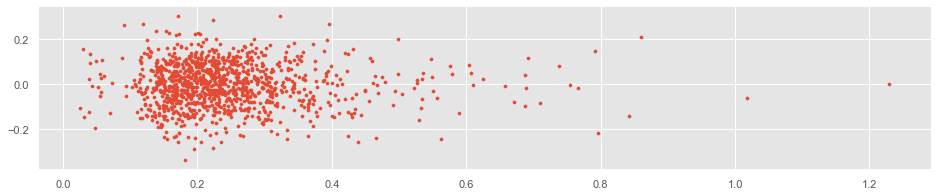

In [522]:
jitter_plot(not_white_df['dl_percent'],white_df['dl_percent'][:1089]);

In [465]:
res = stats.mannwhitneyu(not_white_df['dl_percent'], white_df['dl_percent'], alternative="less")
print("p-value for (not white) > (white): {:2.3f}".format(res.pvalue))

p-value for (not white) > (white): 0.992


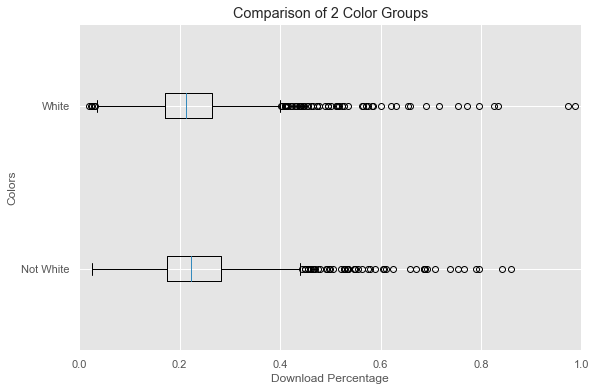

In [554]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.xlim(0, 1)
bp = ax.boxplot([not_white_df['dl_percent'], white_df['dl_percent']], labels=['Not White', 'White'], vert=False)
ax.set_title('Comparison of 2 Color Groups')
ax.set_ylabel('Colors')
ax.set_xlabel('Download Percentage');

Since our p-value is so high, we failed to reject the null hypothesis:
Non-white pictures are more engaging than white pictures

In [457]:
not_black_df = Unsplash_df[Unsplash_df['main_color'] != 'black']
black_df = Unsplash_df[Unsplash_df['main_color'] == 'black']

In [463]:
# not_black_df.describe()

In [464]:
res = stats.mannwhitneyu(not_black_df['dl_percent'], black_df['dl_percent'], alternative="less")
print("p-value for (not black) > (black): {:2.3f}".format(res.pvalue))

p-value for (not black) > (black): 0.910


# Holistic Multi Plots

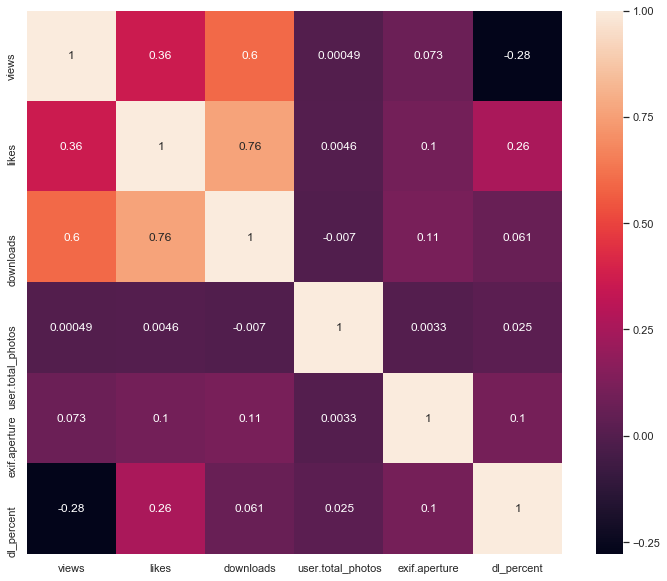

In [26]:
plt.subplots(1, figsize=(12,10))
sns.heatmap(Unsplash_df[['views', 'likes', 'downloads', 'user.total_photos', 'exif.aperture', 'dl_percent']].corr(), annot=True);

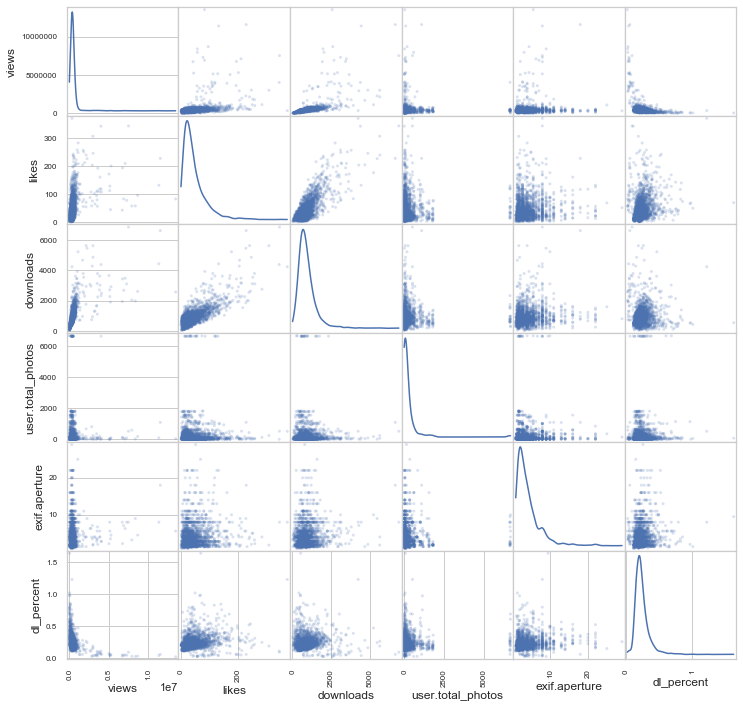

In [27]:
pd.plotting.scatter_matrix(Unsplash_df[['views', 'likes', 'downloads', 'user.total_photos', 'exif.aperture', 'dl_percent']].applymap(lambda x:x*1), alpha=0.2, figsize=(12,12), diagonal='kde');

# Mapping Lat and Long

In [ ]:
map_df = full_df[['user.username', 'location.position.latitude', 'location.position.longitude']].dropna()
map_df

In [ ]:
m = folium.Map([46.196358, 6.473567], zoom_start=11)
m

In [ ]:
for index, row in map_df.iterrows():
    folium.CircleMarker([row['location.position.latitude'], row['location.position.longitude']],
                        radius=15,
                        popup=row['user.username'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [ ]:
stationArr = map_df[['location.position.latitude', 'location.position.longitude']].as_matrix()
m.add_children(plugins.HeatMap(stationArr, radius=15))
m